# Exploratory Data Analysis (EDA) on Iris Datset

### It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

#### The columns in this dataset are:

* Id
* SepalLengthCm
* SepalWidthCm
* PetalLengthCm
* PetalWidthCm
* Species

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [60]:
df = pd.read_csv('iris.csv')

In [61]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [62]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [63]:
#Get column names
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [64]:
#Rename columns
df.rename({'SepalLengthCm' : 'SepalLength', 'SepalWidthCm' : 'SepalWidth', 'PetalLengthCm': 'PetalLength', 'PetalWidthCm' : 'PetalWidth'} , axis=1, inplace=True)

In [65]:
df.columns

Index(['Id', 'SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth',
       'Species'],
      dtype='object')

In [66]:
#number of rows and columns
df.shape

(150, 6)

In [67]:
df.describe()

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [68]:
#Get size of data for each class lable
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

#### This is a balanced dataset as each class label is having equal data points

In [69]:
#calculate median of each species
x = df.groupby('Species').median()
x

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,,
Iris-setosa,25.5,5.0,3.4,1.50,0.2
Iris-versicolor,75.5,5.9,2.8,4.35,1.3
Iris-virginica,125.5,6.5,3.0,5.55,2.0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           150 non-null    int64  
 1   SepalLength  150 non-null    float64
 2   SepalWidth   150 non-null    float64
 3   PetalLength  150 non-null    float64
 4   PetalWidth   150 non-null    float64
 5   Species      150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [71]:
df.isnull().sum()

Id             0
SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

In [72]:
df.drop_duplicates(subset ="Species",)

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica


# Data Visualization

#### Visualizing the target column

### Count Plot

##### A count plot is a type of bar plot that shows the counts of observations in each category of a categorical variable. It’s useful for visualizing the distribution of a single categorical variable.

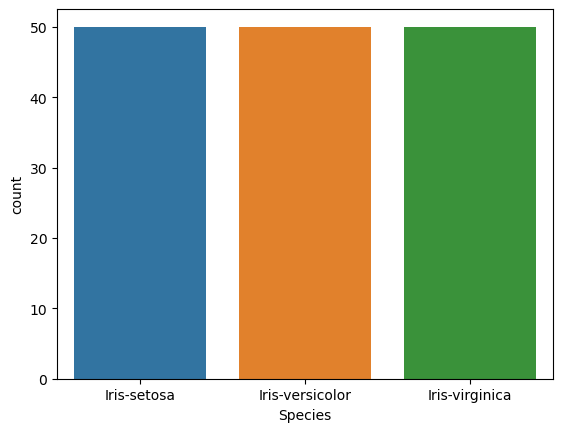

In [73]:
sns.countplot(x='Species', data=df, )
plt.show()

## 2D Scatter Plot

##### A 2D scatter plot of the Iris dataset visualizes two features, with points for each flower. Colors represent the three species: Setosa, Versicolor, and Virginica, highlighting clustering and relationships

#### Comparing Sepal Length and Sepal Width:

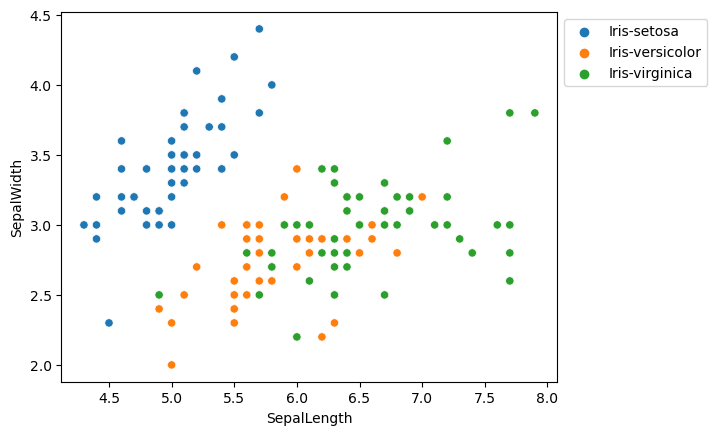

In [74]:
sns.scatterplot(x='SepalLength', y='SepalWidth',  hue='Species', data=df, )              
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

#### From above plot,
* Species Setosa has smaller sepal lengths but larger sepal widths.
* Versicolor Species lies in the middle of the other two species in terms of sepal length and width
* Species Virginica has larger sepal lengths but smaller sepal widths.

#### Comparing Petal Length and Petal Width:

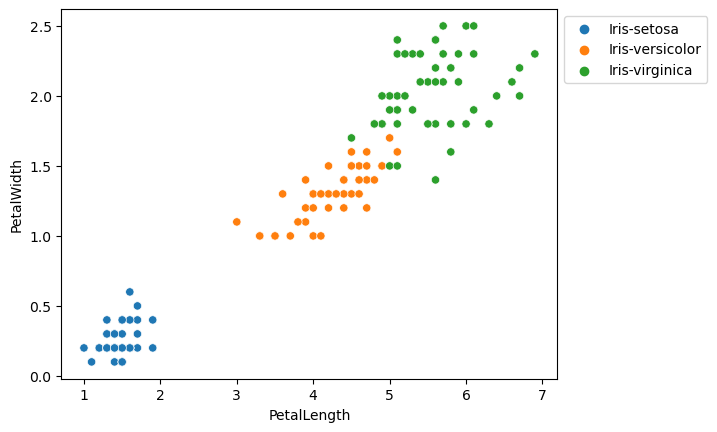

In [75]:
sns.scatterplot(x='PetalLength', y='PetalWidth',hue='Species', data=df, )                
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

##### From above plot,
* Species Setosa has smaller petal lengths and widths.
* Versicolor Species lies in the middle of the other two species in terms of petal length and width
* Species Virginica has the largest of petal lengths and widths.

## Pair plot

##### A pairplot is a visualization tool used to plot pairwise relationships between variables in a dataset. It creates a grid of scatterplots for each pair of variables, along with distribution plots on the diagonal for individual variables.

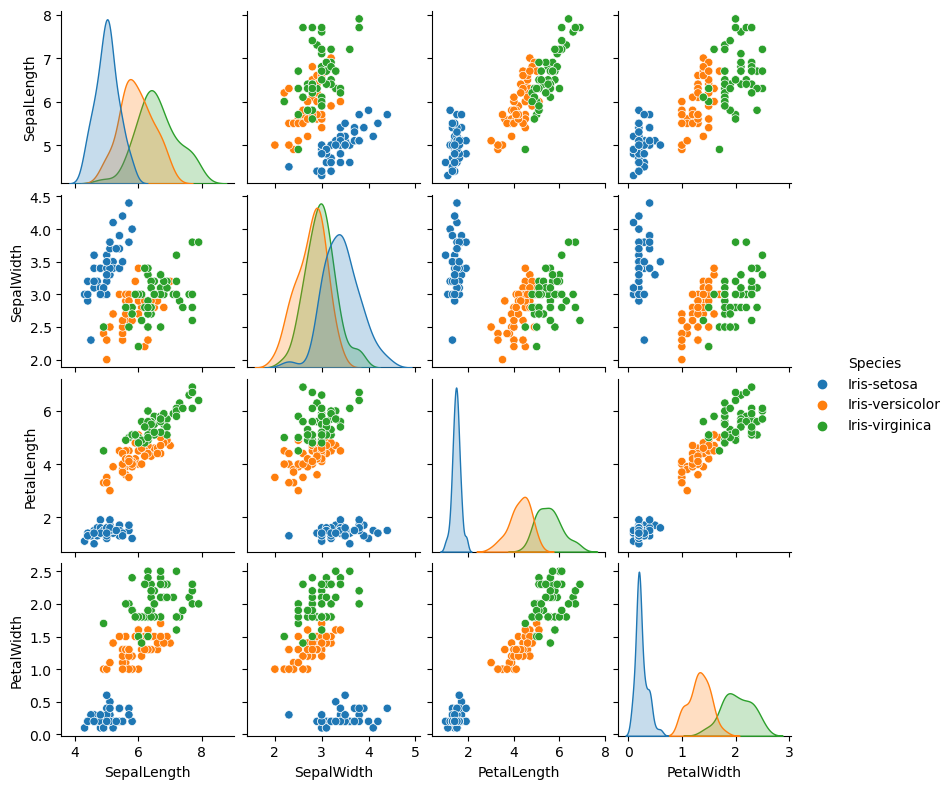

In [79]:
sns.pairplot(df.drop(['Id'], axis = 1), hue='Species', height=2)                       

##### We can see many types of relationships from this plot such as the species Setosa has the smallest of petals widths and lengths. It also has the smallest sepal length but larger sepal widths.

## Histograms

#### A histogram is a graphical representation of the distribution of numerical data. It displays data by grouping it into continuous intervals (called "bins") and then plotting the frequency (count) of data points that fall into each bin.

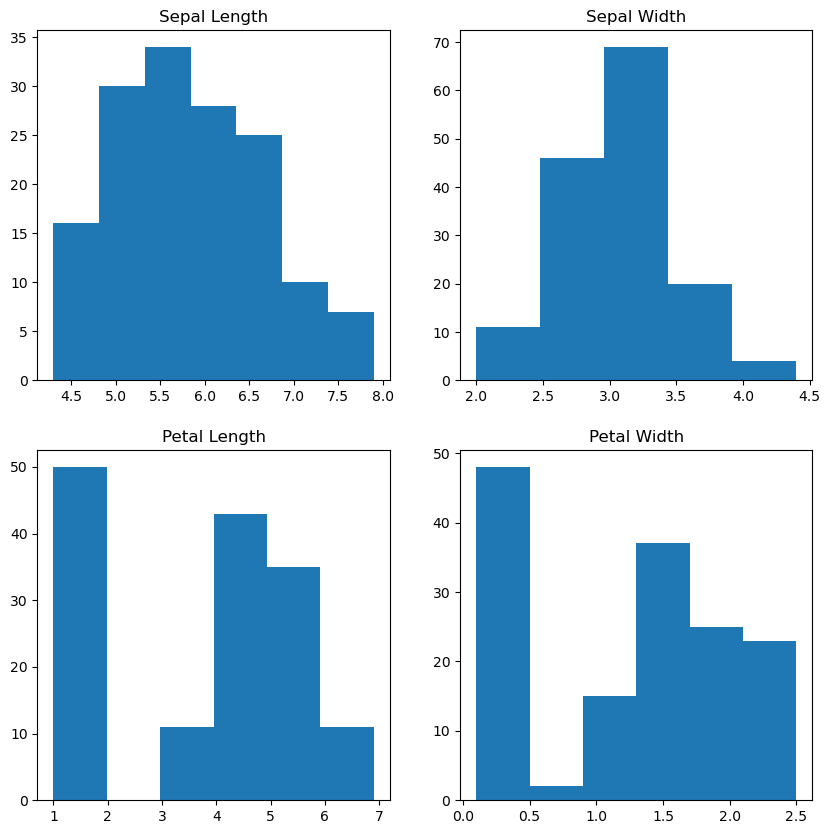

In [77]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df['SepalLength'], bins=7)

axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['SepalWidth'], bins=5);

axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['PetalLength'], bins=6);

axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['PetalWidth'], bins=6);

#### From the above plot, we can see that : 
* The highest frequency of the sepal length is between 30 and 35 which is between 5.5 and 6
* The highest frequency of the sepal Width is around 70 which is between 3.0 and 3.5
* The highest frequency of the petal length is around 50 which is between 1 and 2
* The highest frequency of the petal width is between 40 and 50 which is between 0.0 and 0.5

## Histograms with Distplot Plot

#### A histogram with a distplot is a way to visualize the distribution of a dataset using both a histogram and a smooth curve representing the probability density function (PDF). The histogram shows the count of data points within certain intervals (bins), and the KDE (Kernel Density Estimate) curve gives an estimate of the underlying distribution.

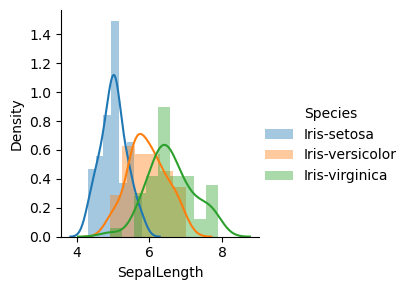

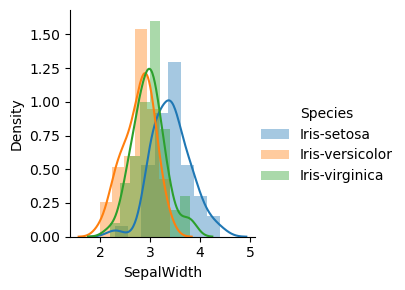

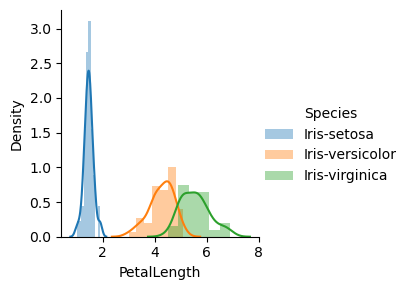

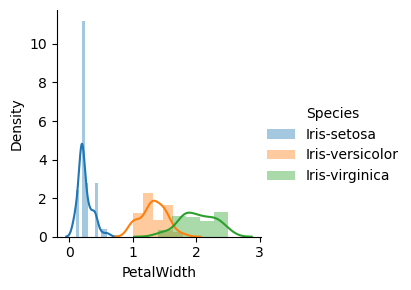

In [80]:
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.distplot, "SepalLength").add_legend()
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.distplot, "SepalWidth").add_legend()
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.distplot, "PetalLength").add_legend()
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.distplot, "PetalWidth").add_legend()
plt.show()

#### From the above plots, we can see that :
* In the case of Sepal Length, there is a huge amount of overlapping.
* In the case of Sepal Width also, there is a huge amount of overlapping.
* In the case of Petal Length, there is a very little amount of overlapping.
* In the case of Petal Width also, there is a very little amount of overlapping.

## Boxplots

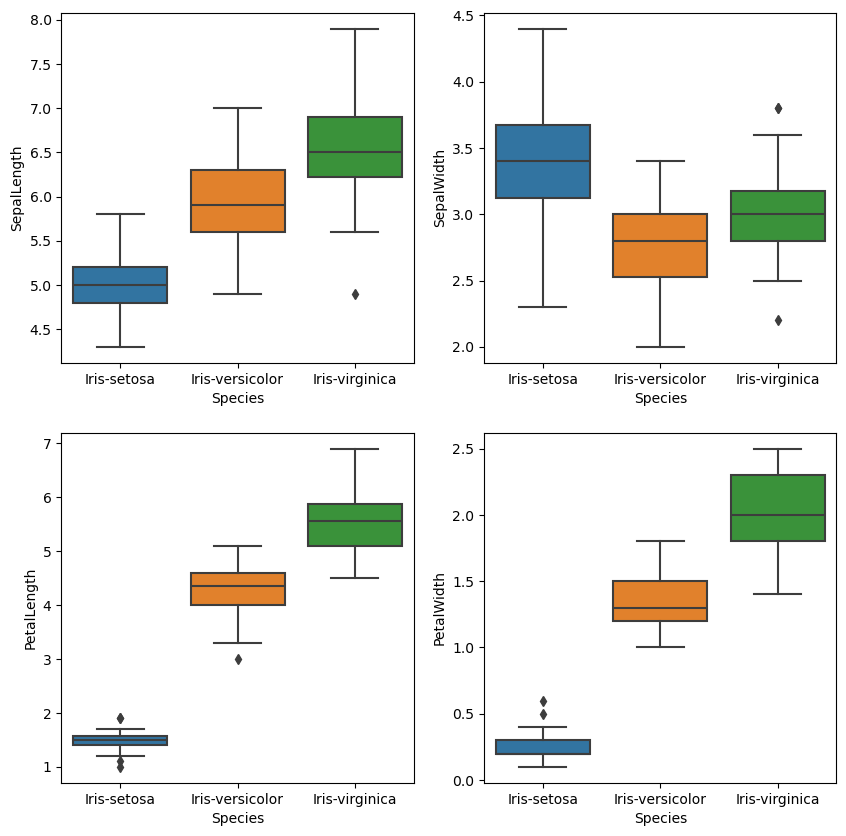

In [99]:
def graph(y):
    sns.boxplot(x="Species", y=y, data=df)
plt.figure(figsize=(10,10))    
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('SepalLength')
plt.subplot(222)
graph('SepalWidth')
plt.subplot(223)
graph('PetalLength')
plt.subplot(224)
graph('PetalWidth')
plt.show()

##### From the above graph, we can see that :
* Species Setosa has the smallest features and less distributed with some outliers.
* Species Versicolor has the average features.
* Species Virginica has the highest features

## Violinplot

##### A violin plot is a data visualization that combines a boxplot with a density plot. It shows the distribution of the data across different categories, allowing you to see the data's density and its summary statistics.The thinner part denotes that there is less density whereas the fatter part conveys higher density.



<Axes: xlabel='Species', ylabel='PetalWidth'>

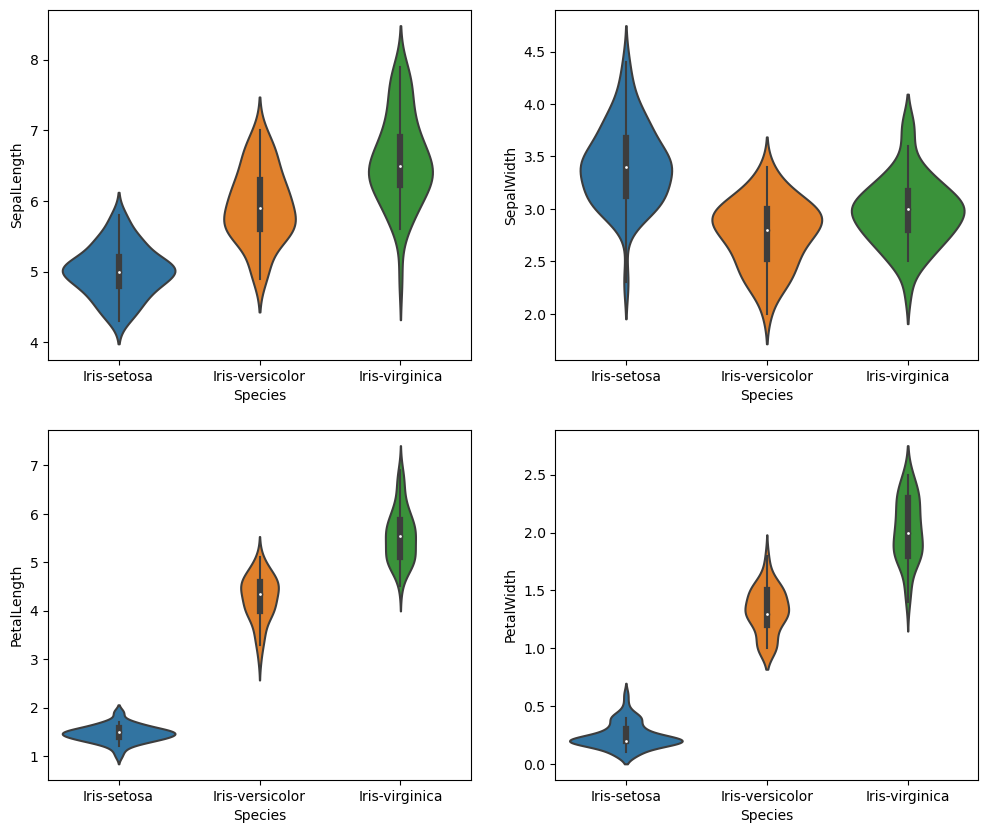

In [103]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x="Species",y="SepalLength",data=df)
plt.subplot(2,2,2)
sns.violinplot(x="Species",y="SepalWidth",data=df)
plt.subplot(2,2,3)
sns.violinplot(x="Species",y="PetalLength",data=df)
plt.subplot(2,2,4)
sns.violinplot(x="Species",y="PetalWidth",data=df)

                   Id  SepalLength  SepalWidth  PetalLength  PetalWidth
Id           1.000000     0.716676   -0.397729     0.882747    0.899759
SepalLength  0.716676     1.000000   -0.109369     0.871754    0.817954
SepalWidth  -0.397729    -0.109369    1.000000    -0.420516   -0.356544
PetalLength  0.882747     0.871754   -0.420516     1.000000    0.962757
PetalWidth   0.899759     0.817954   -0.356544     0.962757    1.000000


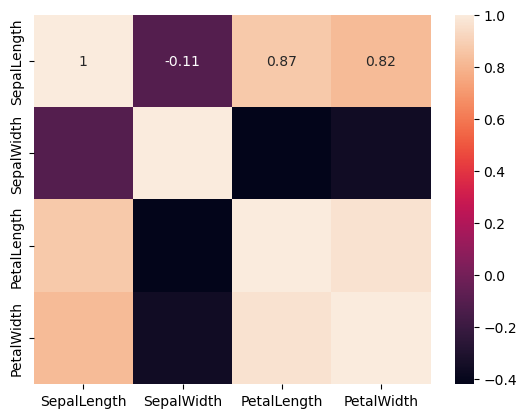

In [118]:
print(df.select_dtypes(include=['number']).corr(method='pearson'))
sns.heatmap(df.select_dtypes(include=['number']).corr(method='pearson').drop( ['Id'], axis=1).drop(['Id'], axis=0), annot = True);
plt.show()

### Import sklearn libraries to build our models

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, metrics
from sklearn.tree import DecisionTreeClassifier

In [107]:
x,y=train_test_split(df,test_size=0.3)
x.shape,y.shape

((105, 6), (45, 6))

In [110]:
train_X=x[["SepalLength","SepalWidth","PetalLength","PetalWidth"]]
train_y=x.Species

In [111]:
test_X=y[['SepalLength',"SepalWidth","PetalLength","PetalWidth"]]
test_y=y.Species

### SVM

In [114]:
svmmodel=svm.SVC()
svmmodel.fit(train_X,train_y)
svmprediction=svmmodel.predict(test_X)
svmaccuracy=metrics.accuracy_score(svmprediction,test_y)
print("SVM model accuracy is {}".format(svmaccuracy))

SVM model accuracy is 0.9555555555555556


### Logistic Regression

In [115]:
lrmodel=LogisticRegression()
lrmodel.fit(train_X,train_y)
lrprediction=lrmodel.predict(test_X)
lraccuracy=metrics.accuracy_score(lrprediction,test_y)
print("Logistic Regression Model Accuracy is {} ".format(lraccuracy))

Logistic Regression Model Accuracy is 0.9333333333333333 


### Decision Tree Classifier

In [116]:
dtmodel=DecisionTreeClassifier()
dtmodel.fit(train_X,train_y)
dtpredict=dtmodel.predict(test_X)
dtaccuracy=metrics.accuracy_score(dtpredict,test_y)
print("Decission Tree Model Accuracy is {}".format(dtaccuracy*100))

Decission Tree Model Accuracy is 93.33333333333333


#### We can see that SVM model is producing the better accuracy than Logistic Regression and Decission Tree Models.